In [23]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [24]:
def read_csv(path_file_name):
    df = pd.read_csv(path_file_name, index_col=False)
    return df

In [25]:
path_file_name= "pokemon_trainer_application_data.csv" 
df= read_csv(path_file_name)
print(df.shape)
df.head()

/Users/h/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


(100000, 85)


,ApplicationStatus,ApplicationType,ApplyDate,CurrentlyEmployed,CurrentlyTrainingPokemon,CurrentlyWorkInThisRegion,GraduateSchoolGPA,GraduateSchoolGraduate,GymBadge1Pokemon,GymBadge2Pokemon,...,ReferenceRelationship3,SpokenWithCurrentBoss,TechnicalSchoolGPA,TechnicalSchoolGraduate,TotalYearsOfExp,UndergradSchoolGPA,UndergradSchoolGraduate,WorkedInThisRegion,WorkingForJobAppliedFor,hired
0,Filed Not Hired,Applicant,2013-11-26,False,NaN,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,False,NaN,0.0
1,Filed Not Hired,Applicant,2013-11-27,True,NaN,False,NaN,NaN,NaN,NaN,...,Fellow Trainer,NaN,NaN,NaN,5.0,NaN,No,False,NaN,0.0
2,Filed Not Hired,Applicant,2013-11-22,NaN,NaN,False,NaN,NaN,NaN,NaN,...,Fellow Trainer,NaN,NaN,NaN,5.0,3.0,Yes,False,NaN,0.0
3,Filed Not Hired,Applicant,2013-11-23,True,NaN,False,NaN,NaN,Seedot,NaN,...,Boss,NaN,NaN,Yes,1.0,2.4,No,False,NaN,0.0
4,New,Applicant,2013-11-23,True,NaN,False,NaN,NaN,NaN,NaN,...,Professor,NaN,NaN,NaN,3.0,3.0,No,False,NaN,NaN


#### *team: combine  PokemonWorldRegion and PokemonTrainerClass

count                 99996
unique                   49
top       (Kanto, Engineer)
freq                  14631
Name: team, dtype: object


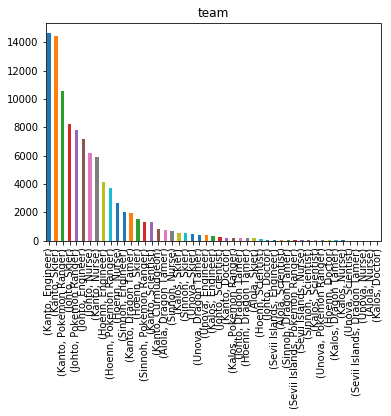

In [26]:
def plot_col_bar(df, feature, num_bar=20):
    print( df[feature].describe() )
    df[feature].value_counts().nlargest(num_bar).plot(kind='bar', title=feature)
    
df['team']= '(' + df['PokemonWorldRegion']+ ', ' + df['PokemonTrainerClass'] + ')'
plot_col_bar(df, 'team', num_bar=49)

#### *compute hired rate, SE and confidence interval

In [28]:
def hire_rate(name, df_team):
    num_hired= df_team[ df_team['hired']==1 ].shape[0]
    num_not_hired= df_team[ df_team['hired']==0 ].shape[0]       
    return num_hired, num_not_hired

cols= ['team','hired','not_hired']
data= []
for name, df_team in df.groupby('team'):
    num_hired, num_not_hired= hire_rate(name, df_team)
    d= {cols[0]: name, cols[1]: num_hired, cols[2]:num_not_hired}
    data.append(d)
df_hired= pd.DataFrame(data)  
df_hired= df_hired[cols]

#df_hired.at[33, 'hired']= 1450
#df_hired.at[33, 'not_hired']= 13050
df_hired['total']= df_hired['hired'] + df_hired['not_hired']
df_hired['hired_rate']= df_hired['hired'] / df_hired['total']

#when confidence level is 95%, Z is 1.96
rate= df_hired['hired_rate']
n= df_hired['total']
df_hired['SE']= 1.96 * (rate*(1-rate)/n)**.5
df_hired['confidence interval low %'] = 100*( df_hired['hired_rate'] - df_hired['SE'] )
df_hired['confidence interval high %']= 100*( df_hired['hired_rate'] + df_hired['SE'] )
df_hired

,team,hired,not_hired,total,hired_rate,SE,confidence interval low %,confidence interval high %
0,"(Alola, Dragon Tamer)",9,729,738,0.012195,0.007919,0.427637,2.011387
1,"(Alola, Nurse)",0,1,1,0.000000,0.000000,0.000000,0.000000
2,"(Alola, Scientist)",1,38,39,0.025641,0.049608,-2.396689,7.524894
3,"(Alola, Skier)",0,155,155,0.000000,0.000000,0.000000,0.000000
4,"(Hoenn, Doctor)",1,11,12,0.083333,0.156380,-7.304643,23.971309
5,"(Hoenn, Dragon Tamer)",2,182,184,0.010870,0.014982,-0.411279,2.585192
6,"(Hoenn, Engineer)",54,4064,4118,0.013113,0.003475,0.963860,1.658773
7,"(Hoenn, Nurse)",77,2524,2601,0.029604,0.006514,2.309018,3.611782
8,"(Hoenn, Pokemon Ranger)",123,3546,3669,0.033524,0.005824,2.769965,3.934859
9,"(Hoenn, Scientist)",3,126,129,0.023256,0.026009,-0.275281,4.926444


#### *From above, population of each team is different and there is overlap of hired rate.         
step1: compute Z Score for 1 Population Proportion and remove team with p value > 0.05   
step2: compute Z Score for 2 Population Proportions for all pair team and find out lowest rate with signifitence  difference

step 1

In [29]:
def z_score1(row): 
    hired, tot= row[0], row[1]    
    value = 0
    stat, pval = proportions_ztest(hired, tot, value)
    #print(hired, tot, value, '{0:0.3f}'.format(pval))
    return pval

def func(row):
    r= row[['hired', 'total']].as_matrix()
    return z_score1(r) # p val

#compute p value 
df_hired['p-val']= df_hired.apply(func, axis=1)
#drop team with  p value < 0.05
df_hired= df_hired[ df_hired['p-val'] < 0.05 ]
df_hired= df_hired.dropna()

#rank hired rate
df_hired= df_hired.sort_values(by=['hired_rate'])
df_hired= df_hired.reset_index(drop=True)
df_hired

/Users/h/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/h/anaconda3/lib/python3.6/site-packages/statsmodels/stats/weightstats.py:670: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std_diff
/Users/h/anaconda3/lib/python3.6/site-packages/statsmodels/stats/proportion.py:823: RuntimeWarning: invalid value encountered in double_scalars
  prop = count * 1. / nobs
/Users/h/anaconda3/lib/python3.6/site-packages/statsmodels/stats/proportion.py:837: RuntimeWarning: invalid value encountered in double_scalars
  p_pooled = np.sum(count) * 1. / np.sum(nobs)
/Users/h/anaconda3/lib/python3.6/site-packages/statsmodels/stats/proportion.py:839: RuntimeWarning: divide by zero encountered in true_divide
  nobs_fact = np.sum(1. / nobs)
/Users/h/anaconda3/lib/python3.6/site-packages/statsmodels/stats/weightstats.py:670: RuntimeWarning:

,team,hired,not_hired,total,hired_rate,SE,confidence interval low %,confidence interval high %,p-val
0,"(Johto, Skier)",47,7757,7804,0.006023,0.001717,0.430593,0.773918,6.138718e-12
1,"(Sinnoh, Engineer)",13,1977,1990,0.006533,0.003540,0.299309,1.007224,2.975931e-04
2,"(Hoenn, Skier)",12,1533,1545,0.007767,0.004377,0.338950,1.214448,5.058614e-04
3,"(Johto, Engineer)",61,6930,6991,0.008726,0.002180,0.654539,1.090562,4.345140e-15
4,"(Kanto, Skier)",146,13716,13862,0.010532,0.001699,0.883294,1.223184,5.937509e-34
5,"(Kanto, Engineer)",161,14419,14580,0.011043,0.001696,0.934623,1.273881,2.769601e-37
6,"(Alola, Dragon Tamer)",9,729,738,0.012195,0.007919,0.427637,2.011387,2.540615e-03
7,"(Hoenn, Engineer)",54,4064,4118,0.013113,0.003475,0.963860,1.658773,1.391602e-13
8,"(Kanto, Dragon Tamer)",33,1867,1900,0.017368,0.005874,1.149414,2.324270,6.827681e-09
9,"(Johto, Pokemon Ranger)",150,7349,7499,0.020003,0.003169,1.683375,2.317158,3.713653e-35


step2: the most competitive team satisfy two conditions:
1. the team have lowest hired rate 
2. acheive all pair significant difference to other teams

In [30]:
def z_score2(row1, row2):
    hired1, tot1= row1
    hired2, tot2= row2
    
    #the number of successes in nobs trials
    counts = np.array([hired1, hired2]) #
    # the number of observations 
    nobs = np.array([tot1, tot2])  #total samples for each group

    stat, pval = proportions_ztest(counts, nobs)
    
    if pval <= 0.05: return True
    else: return False

 
def row2series(i):
    return [ df_hired.at[i, 'hired'], df_hired.at[i, 'total'] ]

n= len(df_hired)
for i in range(n):    
    if all( z_score2( row2series(i), row2series(j) ) for j in range(i+1, n) ):
        print ("the most competitive team:")
        print("--------------------------")
        print(df_hired.loc[i])
        break

the most competitive team:
--------------------------
team                          (Kanto, Nurse)
hired                                    208
not_hired                               5544
total                                   5752
hired_rate                         0.0361613
SE                                0.00482471
confidence interval low %            3.13366
confidence interval high %            4.0986
p-val                            7.44272e-49
Name: 21, dtype: object
